<h2> DATA PREPARATION FOR MUSOMA STATION 2020 -2022</h2>

In [117]:
import pandas as pd
import numpy as np

In [118]:
df =pd.read_csv('kisumu-2022.csv', encoding = 'latin1')
df.head()

,Unnamed: 0,station_ID,Date,TC,TdC,Hr,ddd,ffkmh,P0hPa,Precmm,Prechrs,Nt,Nh,HKm,Viskm
0,2,63708,31/12/2022 18:00,22.6,17.2,72.0,W,9.3,885.1,0.0/12h,12h,3,1.0,2.5,20.0
1,3,63708,31/12/2022 12:00,29.0,13.5,39.0,SW,14.8,883.6,0.0/6h,6h,1,1.0,0.6,30.0
2,4,63708,31/12/2022 9:00,27.0,12.9,42.0,SSW,11.1,886.5,NaN,NaN,1,1.0,0.6,30.0
3,5,63708,31/12/2022 6:00,22.3,12.8,55.0,E,14.8,888.0,0.0/1h,1h,1,1.0,0.6,30.0
4,6,63708,31/12/2022 3:00,17.8,14.0,78.0,ENE,5.6,886.8,NaN,NaN,3,1.0,NaN,20.0


In [119]:
# replace "?" to NaN
df.replace("Tr/24h", 0.01, inplace = True)
df.replace("Tr/18h", 0.01, inplace = True)
df.replace("Tr/15h", 0.01, inplace = True)
df.replace("Tr/12h", 0.01, inplace = True)
df.replace("Tr/6h", 0.01, inplace = True)
df.replace("Tr/3h", 0.01, inplace = True)
df.replace("Tr/1h", 0.01, inplace = True)
df.replace("Tr", 0.01, inplace = True)
df.head()

,Unnamed: 0,station_ID,Date,TC,TdC,Hr,ddd,ffkmh,P0hPa,Precmm,Prechrs,Nt,Nh,HKm,Viskm
0,2,63708,31/12/2022 18:00,22.6,17.2,72.0,W,9.3,885.1,0.0/12h,12h,3,1.0,2.5,20.0
1,3,63708,31/12/2022 12:00,29.0,13.5,39.0,SW,14.8,883.6,0.0/6h,6h,1,1.0,0.6,30.0
2,4,63708,31/12/2022 9:00,27.0,12.9,42.0,SSW,11.1,886.5,NaN,NaN,1,1.0,0.6,30.0
3,5,63708,31/12/2022 6:00,22.3,12.8,55.0,E,14.8,888.0,0.0/1h,1h,1,1.0,0.6,30.0
4,6,63708,31/12/2022 3:00,17.8,14.0,78.0,ENE,5.6,886.8,NaN,NaN,3,1.0,NaN,20.0


In [120]:
df_bukoba=df.replace(['/24h','/18h','/15h','/6h','/3h','/12h','/2h', '/1h'],['','','','','','','',''], regex=True)
df_bukoba.tail()

,Unnamed: 0,station_ID,Date,TC,TdC,Hr,ddd,ffkmh,P0hPa,Precmm,Prechrs,Nt,Nh,HKm,Viskm
2705,2326,63708,01/01/2022 12:00,27.6,17.9,55.0,WSW,22.2,NaN,0.0,6h,6,3.0,0.6,30.0
2706,2334,63708,01/01/2022 9:00,24.8,17.2,63.0,W,11.1,NaN,NaN,NaN,6,3.0,0.6,30.0
2707,2344,63708,01/01/2022 6:00,22.3,16.7,71.0,CAL,3.7,NaN,3.0,24h,5,2.0,0.6,30.0
2708,2354,63708,01/01/2022 3:00,17.3,16.2,93.0,N,7.4,NaN,NaN,NaN,6,1.0,0.3,20.0
2709,2364,63708,01/01/2022 0:00,18.0,16.0,88.0,ESE,5.6,NaN,3.0,6h,6,1.0,0.3,20.0


In [121]:
# Check for missing data
missing_data = df_bukoba.isnull()
missing_data.head(5)

,Unnamed: 0,station_ID,Date,TC,TdC,Hr,ddd,ffkmh,P0hPa,Precmm,Prechrs,Nt,Nh,HKm,Viskm
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,True,False,False,True,False


In [122]:
# count the number of missing values
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

Unnamed: 0
False    2710
Name: Unnamed: 0, dtype: int64

station_ID
False    2710
Name: station_ID, dtype: int64

Date
False    2710
Name: Date, dtype: int64

TC
False    2681
True       29
Name: TC, dtype: int64

TdC
False    2690
True       20
Name: TdC, dtype: int64

Hr
False    2671
True       39
Name: Hr, dtype: int64

ddd
False    2629
True       81
Name: ddd, dtype: int64

ffkmh
False    2704
True        6
Name: ffkmh, dtype: int64

P0hPa
False    2003
True      707
Name: P0hPa, dtype: int64

Precmm
True     1403
False    1307
Name: Precmm, dtype: int64

Prechrs
True     1403
False    1307
Name: Prechrs, dtype: int64

Nt
False    2710
Name: Nt, dtype: int64

Nh
False    2694
True       16
Name: Nh, dtype: int64

HKm
False    2358
True      352
Name: HKm, dtype: int64

Viskm
False    2708
True        2
Name: Viskm, dtype: int64



In [123]:
df_bukoba.dtypes

Unnamed: 0      int64
station_ID      int64
Date           object
TC            float64
TdC           float64
Hr            float64
ddd            object
ffkmh         float64
P0hPa         float64
Precmm         object
Prechrs        object
Nt              int64
Nh            float64
HKm           float64
Viskm         float64
dtype: object

In [124]:
df_bukoba.replace('Tr', 0.01, inplace = True)

In [127]:
df_bukoba.replace('0.00.0', 0.0, inplace = True)

In [128]:
df_bukoba.replace('192.60.0', 192.60, inplace = True)

In [129]:
df_bukoba['Precmm'] = df_bukoba['Precmm'].astype(float)

In [130]:
avg_Viskm = df_bukoba["Viskm"].astype("float").mean(axis=0)
print("Average of Viskm:", avg_Viskm)

Average of Viskm: 26.70864106351551


In [131]:
df_bukoba["Viskm"].replace(np.nan, avg_Viskm, inplace=True)

In [132]:
avg_HKm = df_bukoba["HKm"].astype("float").mean(axis=0)
print("Average of HKm:", avg_HKm)

Average of HKm: 0.70568278201864


In [133]:
df_bukoba["HKm"].replace(np.nan, avg_HKm, inplace=True)

In [134]:
avg_Nh = df_bukoba["Nh"].astype("float").mean(axis=0)
print("Average of Nh:", avg_Nh)

Average of Nh: 2.1688938381588714


In [135]:
df_bukoba["Nh"].replace(np.nan, avg_Nh, inplace=True)

In [136]:
avg_TC = df_bukoba["TC"].astype("float").mean(axis=0)
print("Average of TC:", avg_TC)

Average of TC: 22.923759791122762


In [137]:
df_bukoba["TC"].replace(np.nan, avg_TC, inplace=True)

In [138]:
avg_Precmm  = df_bukoba["Precmm"].astype("float").mean(axis=0)
print("Average of Precmm :", avg_Precmm )

Average of Precmm : 2.499579188982404


In [139]:
df_bukoba["Precmm"].replace(np.nan, avg_Precmm, inplace=True)

In [140]:
avg_P0hPa  = df_bukoba["P0hPa"].astype("float").mean(axis=0)
print("Average of P0hPa:", avg_P0hPa)

Average of P0hPa: 883.5912131802285


In [141]:
df_bukoba["P0hPa"].replace(np.nan, avg_P0hPa, inplace=True)

In [142]:
avg_Hr = df_bukoba["Hr"].astype("float").mean(axis=0)
print("Average of Hr:", avg_Hr)

Average of Hr: 69.73680269561962


In [143]:
df_bukoba["Hr"].replace(np.nan, avg_Hr, inplace=True)

In [144]:
avg_TdC = df_bukoba["TdC"].astype("float").mean(axis=0)
print("Average of TdC:", avg_TdC)

Average of TdC: 16.624052044609645


In [145]:
df_bukoba["TdC"].replace(np.nan, avg_TdC, inplace=True)

In [146]:
avg_ffkmh = df_bukoba["ffkmh"].astype("float").mean(axis=0)
print("Average of ffkmh:", avg_ffkmh)

Average of ffkmh: 9.97059911242602


In [147]:
df_bukoba["ffkmh"].replace(np.nan, avg_TC, inplace=True)

In [148]:
df_bukoba['Prechrs'].value_counts().idxmax()

'1h'

In [149]:
df_bukoba["Prechrs"].replace(np.nan, "3h", inplace = True)

In [150]:
df_bukoba['ddd'].value_counts().idxmax()

'SW'

In [151]:
df_bukoba["ddd"].replace(np.nan, "3h", inplace = True)

In [152]:
df_bukoba.head()

,Unnamed: 0,station_ID,Date,TC,TdC,Hr,ddd,ffkmh,P0hPa,Precmm,Prechrs,Nt,Nh,HKm,Viskm
0,2,63708,31/12/2022 18:00,22.6,17.2,72.0,W,9.3,885.1,0.000000,12h,3,1.0,2.500000,20.0
1,3,63708,31/12/2022 12:00,29.0,13.5,39.0,SW,14.8,883.6,0.000000,6h,1,1.0,0.600000,30.0
2,4,63708,31/12/2022 9:00,27.0,12.9,42.0,SSW,11.1,886.5,2.499579,3h,1,1.0,0.600000,30.0
3,5,63708,31/12/2022 6:00,22.3,12.8,55.0,E,14.8,888.0,0.000000,1h,1,1.0,0.600000,30.0
4,6,63708,31/12/2022 3:00,17.8,14.0,78.0,ENE,5.6,886.8,2.499579,3h,3,1.0,0.705683,20.0


<AxesSubplot:xlabel='Prechrs', ylabel='TC'>

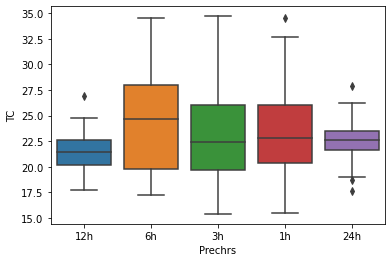

In [153]:
import seaborn as sns
sns.boxplot(x="Prechrs", y="TC", data=df_bukoba)

<AxesSubplot:xlabel='ddd', ylabel='Precmm'>

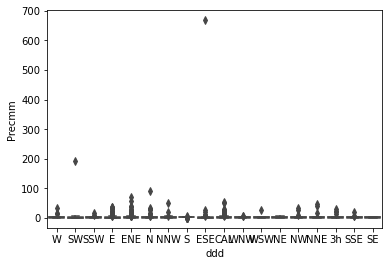

In [154]:
import seaborn as sns
sns.boxplot(x="ddd", y="Precmm", data=df_bukoba)

In [155]:
#replace h in the Prechrs column with nothing
df_bukoba =df_bukoba.replace(['h'],[''], regex = True)
df_bukoba.head()

,Unnamed: 0,station_ID,Date,TC,TdC,Hr,ddd,ffkmh,P0hPa,Precmm,Prechrs,Nt,Nh,HKm,Viskm
0,2,63708,31/12/2022 18:00,22.6,17.2,72.0,W,9.3,885.1,0.000000,12,3,1.0,2.500000,20.0
1,3,63708,31/12/2022 12:00,29.0,13.5,39.0,SW,14.8,883.6,0.000000,6,1,1.0,0.600000,30.0
2,4,63708,31/12/2022 9:00,27.0,12.9,42.0,SSW,11.1,886.5,2.499579,3,1,1.0,0.600000,30.0
3,5,63708,31/12/2022 6:00,22.3,12.8,55.0,E,14.8,888.0,0.000000,1,1,1.0,0.600000,30.0
4,6,63708,31/12/2022 3:00,17.8,14.0,78.0,ENE,5.6,886.8,2.499579,3,3,1.0,0.705683,20.0


In [156]:
# drop the column "Unnamed: 0"

df_bukoba.drop('station_ID', axis = 1)
df_bukoba.head()

,Unnamed: 0,station_ID,Date,TC,TdC,Hr,ddd,ffkmh,P0hPa,Precmm,Prechrs,Nt,Nh,HKm,Viskm
0,2,63708,31/12/2022 18:00,22.6,17.2,72.0,W,9.3,885.1,0.000000,12,3,1.0,2.500000,20.0
1,3,63708,31/12/2022 12:00,29.0,13.5,39.0,SW,14.8,883.6,0.000000,6,1,1.0,0.600000,30.0
2,4,63708,31/12/2022 9:00,27.0,12.9,42.0,SSW,11.1,886.5,2.499579,3,1,1.0,0.600000,30.0
3,5,63708,31/12/2022 6:00,22.3,12.8,55.0,E,14.8,888.0,0.000000,1,1,1.0,0.600000,30.0
4,6,63708,31/12/2022 3:00,17.8,14.0,78.0,ENE,5.6,886.8,2.499579,3,3,1.0,0.705683,20.0


In [157]:
df_bukoba.describe()

,Unnamed: 0,station_ID,TC,TdC,Hr,ffkmh,P0hPa,Precmm,Nt,Nh,HKm,Viskm
count,2710.000000,2710.0,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000
mean,3114.077860,63708.0,22.923760,16.624052,69.736803,9.999278,883.591213,2.499579,4.553875,2.168894,0.705683,26.708641
std,4809.968169,0.0,3.523409,1.882702,15.675464,8.460052,21.818645,14.106024,1.995532,1.488501,0.568687,5.149263
min,2.000000,63708.0,15.400000,4.200000,16.000000,0.000000,382.600000,0.000000,0.000000,0.000000,0.000000,0.500000
25%,701.250000,63708.0,20.000000,15.600000,58.000000,5.600000,883.591213,0.000000,3.000000,1.000000,0.600000,20.000000
50%,1413.500000,63708.0,22.450000,16.900000,71.000000,7.400000,884.000000,2.499579,5.000000,2.000000,0.600000,30.000000
75%,2125.750000,63708.0,25.800000,17.900000,83.000000,13.000000,885.700000,2.499579,6.000000,3.000000,0.600000,30.000000
max,23110.000000,63708.0,34.700000,27.000000,100.000000,148.300000,997.400000,668.000000,8.000000,9.000000,2.500000,40.000000


In [158]:
# create a function to map Precmm values to Rainfall categories
def categorize_rainfall(precmm):
    if precmm <= 4:
        return 'Light'
    elif 4 < precmm <= 16:
        return 'Mild_moderate'
    elif 16 < precmm <= 32:
        return 'Moderate_heavy'
    elif 32 < precmm <= 64:
        return 'Heavy'
    elif 64 < precmm <= 128:
        return 'Heavy_torential'
    else:
        return 'Torential'

# apply the categorize_rainfall function to create a new "Rainfall" column
df_bukoba['Rainfall'] = df_bukoba['Precmm'].apply(categorize_rainfall)

# print the resulting DataFrame
print(df_bukoba)

      Unnamed: 0  station_ID              Date    TC   TdC    Hr  ddd  ffkmh  \
0              2       63708  31/12/2022 18:00  22.6  17.2  72.0    W    9.3   
1              3       63708  31/12/2022 12:00  29.0  13.5  39.0   SW   14.8   
2              4       63708   31/12/2022 9:00  27.0  12.9  42.0  SSW   11.1   
3              5       63708   31/12/2022 6:00  22.3  12.8  55.0    E   14.8   
4              6       63708   31/12/2022 3:00  17.8  14.0  78.0  ENE    5.6   
...          ...         ...               ...   ...   ...   ...  ...    ...   
2705        2326       63708  01/01/2022 12:00  27.6  17.9  55.0  WSW   22.2   
2706        2334       63708   01/01/2022 9:00  24.8  17.2  63.0    W   11.1   
2707        2344       63708   01/01/2022 6:00  22.3  16.7  71.0  CAL    3.7   
2708        2354       63708   01/01/2022 3:00  17.3  16.2  93.0    N    7.4   
2709        2364       63708   01/01/2022 0:00  18.0  16.0  88.0  ESE    5.6   

           P0hPa    Precmm Prechrs  Nt 

In [159]:
df_bukoba.head()

,Unnamed: 0,station_ID,Date,TC,TdC,Hr,ddd,ffkmh,P0hPa,Precmm,Prechrs,Nt,Nh,HKm,Viskm,Rainfall
0,2,63708,31/12/2022 18:00,22.6,17.2,72.0,W,9.3,885.1,0.000000,12,3,1.0,2.500000,20.0,Light
1,3,63708,31/12/2022 12:00,29.0,13.5,39.0,SW,14.8,883.6,0.000000,6,1,1.0,0.600000,30.0,Light
2,4,63708,31/12/2022 9:00,27.0,12.9,42.0,SSW,11.1,886.5,2.499579,3,1,1.0,0.600000,30.0,Light
3,5,63708,31/12/2022 6:00,22.3,12.8,55.0,E,14.8,888.0,0.000000,1,1,1.0,0.600000,30.0,Light
4,6,63708,31/12/2022 3:00,17.8,14.0,78.0,ENE,5.6,886.8,2.499579,3,3,1.0,0.705683,20.0,Light


<h2> Convert to date time object</h2>

In [160]:
df_bukoba['Date'] = pd.to_datetime(df_bukoba['Date'])
df_bukoba.head()

,Unnamed: 0,station_ID,Date,TC,TdC,Hr,ddd,ffkmh,P0hPa,Precmm,Prechrs,Nt,Nh,HKm,Viskm,Rainfall
0,2,63708,2022-12-31 18:00:00,22.6,17.2,72.0,W,9.3,885.1,0.000000,12,3,1.0,2.500000,20.0,Light
1,3,63708,2022-12-31 12:00:00,29.0,13.5,39.0,SW,14.8,883.6,0.000000,6,1,1.0,0.600000,30.0,Light
2,4,63708,2022-12-31 09:00:00,27.0,12.9,42.0,SSW,11.1,886.5,2.499579,3,1,1.0,0.600000,30.0,Light
3,5,63708,2022-12-31 06:00:00,22.3,12.8,55.0,E,14.8,888.0,0.000000,1,1,1.0,0.600000,30.0,Light
4,6,63708,2022-12-31 03:00:00,17.8,14.0,78.0,ENE,5.6,886.8,2.499579,3,3,1.0,0.705683,20.0,Light


<h2> Convert Categorical features to numerical values</h2>

1. Column ddd to replace: <b>  CAL (0), N(360), NNE (22.5), NE (45.0), ENE (67.5), E(90.0), ESE(112.5), SE(135.0),SSE(157.5), S(180.0), SSW(202.5), SW(225.0), WSW(247.5), W(270.0), WNW(292.5), NW(315.0), NNW(337.5)</b>


In [161]:
df_bukoba['ddd'].replace(to_replace=['CAL','N','NNE','NE','ENE','E','ESE','SE','SSE','S','SSW','SW','WSW','W','WNW','NW','NNW'], value=[0,360,22.5,45.0,67.5,90.0,112.5,135.0,157.5,180.0,202.5,225.0,247.5,270.0,292.5,315.0,337.5],inplace=True)

2. Column Rainfall to relplace: <b>'Light'(0), 'Mild_moderate'(1), 'Moderate_heavy'(2), 'Heavy'(3), 'Heavy_torential'(4),'Torential'(5)</b> 

In [162]:
df_bukoba['Rainfall'].replace(to_replace=['Light','Mild_moderate', 'Moderate_heavy','Heavy','Heavy_torential','Torential'], value=[0,1,2,3,4,5],inplace=True)
df_bukoba.head()


,Unnamed: 0,station_ID,Date,TC,TdC,Hr,ddd,ffkmh,P0hPa,Precmm,Prechrs,Nt,Nh,HKm,Viskm,Rainfall
0,2,63708,2022-12-31 18:00:00,22.6,17.2,72.0,270.0,9.3,885.1,0.000000,12,3,1.0,2.500000,20.0,0
1,3,63708,2022-12-31 12:00:00,29.0,13.5,39.0,225.0,14.8,883.6,0.000000,6,1,1.0,0.600000,30.0,0
2,4,63708,2022-12-31 09:00:00,27.0,12.9,42.0,202.5,11.1,886.5,2.499579,3,1,1.0,0.600000,30.0,0
3,5,63708,2022-12-31 06:00:00,22.3,12.8,55.0,90.0,14.8,888.0,0.000000,1,1,1.0,0.600000,30.0,0
4,6,63708,2022-12-31 03:00:00,17.8,14.0,78.0,67.5,5.6,886.8,2.499579,3,3,1.0,0.705683,20.0,0


In [163]:
df_bukoba.describe()

,Unnamed: 0,station_ID,TC,TdC,Hr,ffkmh,P0hPa,Precmm,Nt,Nh,HKm,Viskm,Rainfall
count,2710.000000,2710.0,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000
mean,3114.077860,63708.0,22.923760,16.624052,69.736803,9.999278,883.591213,2.499579,4.553875,2.168894,0.705683,26.708641,0.072325
std,4809.968169,0.0,3.523409,1.882702,15.675464,8.460052,21.818645,14.106024,1.995532,1.488501,0.568687,5.149263,0.380313
min,2.000000,63708.0,15.400000,4.200000,16.000000,0.000000,382.600000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000
25%,701.250000,63708.0,20.000000,15.600000,58.000000,5.600000,883.591213,0.000000,3.000000,1.000000,0.600000,20.000000,0.000000
50%,1413.500000,63708.0,22.450000,16.900000,71.000000,7.400000,884.000000,2.499579,5.000000,2.000000,0.600000,30.000000,0.000000
75%,2125.750000,63708.0,25.800000,17.900000,83.000000,13.000000,885.700000,2.499579,6.000000,3.000000,0.600000,30.000000,0.000000
max,23110.000000,63708.0,34.700000,27.000000,100.000000,148.300000,997.400000,668.000000,8.000000,9.000000,2.500000,40.000000,5.000000


In [164]:
df_bukoba.dtypes

Unnamed: 0             int64
station_ID             int64
Date          datetime64[ns]
TC                   float64
TdC                  float64
Hr                   float64
ddd                   object
ffkmh                float64
P0hPa                float64
Precmm               float64
Prechrs               object
Nt                     int64
Nh                   float64
HKm                  float64
Viskm                float64
Rainfall               int64
dtype: object

In [165]:
df_bukoba['Prechrs'] = df_bukoba['Prechrs'].astype(float)

In [166]:
df_bukoba.dtypes

Unnamed: 0             int64
station_ID             int64
Date          datetime64[ns]
TC                   float64
TdC                  float64
Hr                   float64
ddd                   object
ffkmh                float64
P0hPa                float64
Precmm               float64
Prechrs              float64
Nt                     int64
Nh                   float64
HKm                  float64
Viskm                float64
Rainfall               int64
dtype: object

In [167]:
import pandas as pd

# Assuming you have a DataFrame named "df" with "Precmm" and "Prechrs" columns

# Create a new column "Rain_range" by dividing "Precmm" by "Prechrs"
df_bukoba['Prec_rate'] = df_bukoba['Precmm'] / df_bukoba['Prechrs']

# Display the updated DataFrame
print(df_bukoba)

      Unnamed: 0  station_ID                Date    TC   TdC    Hr    ddd  \
0              2       63708 2022-12-31 18:00:00  22.6  17.2  72.0  270.0   
1              3       63708 2022-12-31 12:00:00  29.0  13.5  39.0  225.0   
2              4       63708 2022-12-31 09:00:00  27.0  12.9  42.0  202.5   
3              5       63708 2022-12-31 06:00:00  22.3  12.8  55.0   90.0   
4              6       63708 2022-12-31 03:00:00  17.8  14.0  78.0   67.5   
...          ...         ...                 ...   ...   ...   ...    ...   
2705        2326       63708 2022-01-01 12:00:00  27.6  17.9  55.0  247.5   
2706        2334       63708 2022-01-01 09:00:00  24.8  17.2  63.0  270.0   
2707        2344       63708 2022-01-01 06:00:00  22.3  16.7  71.0      0   
2708        2354       63708 2022-01-01 03:00:00  17.3  16.2  93.0    360   
2709        2364       63708 2022-01-01 00:00:00  18.0  16.0  88.0  112.5   

      ffkmh       P0hPa    Precmm  Prechrs  Nt   Nh       HKm  Viskm  \
0  

<b> Classification</b>

In [168]:
# create a function to map Precmm values to Rainfall categories
def categorize_rainfall(prec_rate):
    if prec_rate < 2.5:
        return 'Slight'
    elif 2.5 <= prec_rate < 10:
        return 'Moderate'
    elif 10 <= prec_rate < 50:
        return 'Heavy'
    else:
        return 'Violent'

# apply the categorize_rainfall function to create a new "Rainfall" column
df_bukoba['Classification'] = df_bukoba['Prec_rate'].apply(categorize_rainfall)

# print the resulting DataFrame
print(df_bukoba)

      Unnamed: 0  station_ID                Date    TC   TdC    Hr    ddd  \
0              2       63708 2022-12-31 18:00:00  22.6  17.2  72.0  270.0   
1              3       63708 2022-12-31 12:00:00  29.0  13.5  39.0  225.0   
2              4       63708 2022-12-31 09:00:00  27.0  12.9  42.0  202.5   
3              5       63708 2022-12-31 06:00:00  22.3  12.8  55.0   90.0   
4              6       63708 2022-12-31 03:00:00  17.8  14.0  78.0   67.5   
...          ...         ...                 ...   ...   ...   ...    ...   
2705        2326       63708 2022-01-01 12:00:00  27.6  17.9  55.0  247.5   
2706        2334       63708 2022-01-01 09:00:00  24.8  17.2  63.0  270.0   
2707        2344       63708 2022-01-01 06:00:00  22.3  16.7  71.0      0   
2708        2354       63708 2022-01-01 03:00:00  17.3  16.2  93.0    360   
2709        2364       63708 2022-01-01 00:00:00  18.0  16.0  88.0  112.5   

      ffkmh       P0hPa    Precmm  Prechrs  Nt   Nh       HKm  Viskm  \
0  

In [169]:
from sklearn.preprocessing import LabelEncoder

In [170]:
# Encode the "Symptom" column as binary labels (0 for "No", 1 for "Yes")
label_encoder = LabelEncoder()
df_bukoba["Classification"] = label_encoder.fit_transform(df_bukoba["Classification"])

In [171]:
df_bukoba.head()

,Unnamed: 0,station_ID,Date,TC,TdC,Hr,ddd,ffkmh,P0hPa,Precmm,Prechrs,Nt,Nh,HKm,Viskm,Rainfall,Prec_rate,Classification
0,2,63708,2022-12-31 18:00:00,22.6,17.2,72.0,270.0,9.3,885.1,0.000000,12.0,3,1.0,2.500000,20.0,0,0.000000,2
1,3,63708,2022-12-31 12:00:00,29.0,13.5,39.0,225.0,14.8,883.6,0.000000,6.0,1,1.0,0.600000,30.0,0,0.000000,2
2,4,63708,2022-12-31 09:00:00,27.0,12.9,42.0,202.5,11.1,886.5,2.499579,3.0,1,1.0,0.600000,30.0,0,0.833193,2
3,5,63708,2022-12-31 06:00:00,22.3,12.8,55.0,90.0,14.8,888.0,0.000000,1.0,1,1.0,0.600000,30.0,0,0.000000,2
4,6,63708,2022-12-31 03:00:00,17.8,14.0,78.0,67.5,5.6,886.8,2.499579,3.0,3,1.0,0.705683,20.0,0,0.833193,2


In [173]:
df_bukoba.to_csv('df_kisumu63708_2022.csv', index=False)


In [46]:
df_arua1 = df_arua[['TC','TdC','Hr','ddd','ffkmh','P0hPa','Precmm','Prechrs','Nt','Nh','HKm','Viskm','Rainfall']]

In [47]:
df_arua1.head()

,TC,TdC,Hr,ddd,ffkmh,P0hPa,Precmm,Prechrs,Nt,Nh,HKm,Viskm,Rainfall
0,30.1,11.8,32.0,5,7.4,877.4,0.0,3,4,2,0.6,30,0
1,30.6,12.5,33.0,5,11.1,878.5,0.0,6,5,5,0.6,30,0
2,28.5,11.5,35.0,5,27.8,880.7,0.0,3,4,2,0.6,30,0
3,24.2,12.2,47.0,5,7.4,881.3,0.0,24,4,0,2.5,30,0
4,29.5,10.2,30.0,5,18.5,877.9,0.0,6,2,2,0.6,30,0


In [48]:
df_arua1.corr()

,TC,TdC,Hr,ddd,ffkmh,P0hPa,Precmm,Prechrs,Nt,Nh,HKm,Viskm,Rainfall
TC,1.000000,-0.259337,-0.799117,-0.397370,0.126447,-0.425606,-0.060455,-0.692011,-0.258134,0.157432,-0.112013,0.292001,-0.312263
TdC,-0.259337,1.000000,0.752518,0.003833,-0.020003,0.022265,0.043958,0.064289,0.420359,0.429357,-0.368093,-0.026805,0.137610
Hr,-0.799117,0.752518,1.000000,0.269111,-0.117583,0.272408,0.082534,0.491941,0.429870,0.133954,-0.158240,-0.222645,0.327959
ddd,-0.397370,0.003833,0.269111,1.000000,-0.146801,0.185452,0.050957,0.294518,0.068492,-0.070750,-0.031428,-0.143535,0.147218
ffkmh,0.126447,-0.020003,-0.117583,-0.146801,1.000000,-0.346216,0.027882,-0.156728,-0.150947,0.120304,-0.112030,0.007896,-0.032956
P0hPa,-0.425606,0.022265,0.272408,0.185452,-0.346216,1.000000,0.015186,0.352872,0.094608,-0.199259,0.185210,-0.271333,0.109354
Precmm,-0.060455,0.043958,0.082534,0.050957,0.027882,0.015186,1.000000,0.178620,0.038258,0.005391,-0.034365,-0.041335,0.697443
Prechrs,-0.692011,0.064289,0.491941,0.294518,-0.156728,0.352872,0.178620,1.000000,0.022877,-0.365428,0.297764,-0.148235,0.347735
Nt,-0.258134,0.420359,0.429870,0.068492,-0.150947,0.094608,0.038258,0.022877,1.000000,0.382600,-0.158199,-0.337182,0.157982
Nh,0.157432,0.429357,0.133954,-0.070750,0.120304,-0.199259,0.005391,-0.365428,0.382600,1.000000,-0.615826,-0.008309,-0.036319


(0.0, 32.755)

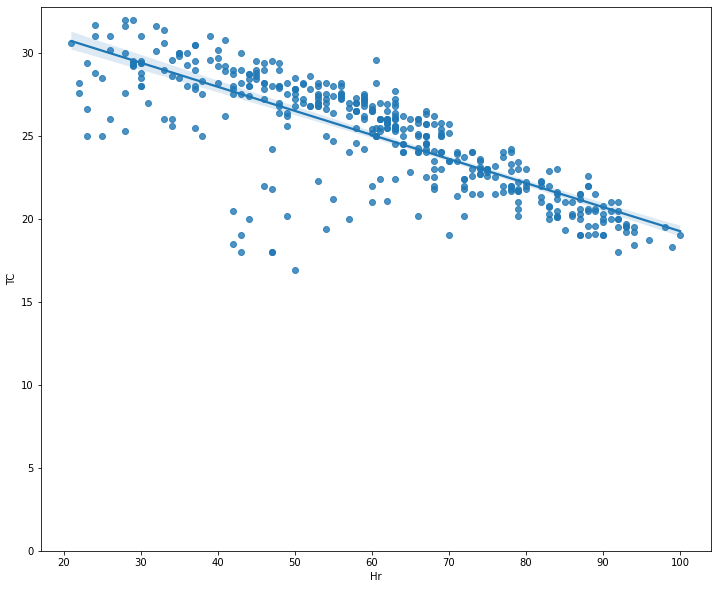

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="Hr", y="TC", data=df_arua1)
plt.ylim(0,)

In [70]:
msk = np.random.rand(len(df_arua1)) < 0.8
train = df_arua1[msk]
test = df_arua1[~msk]

In [71]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Hr']])
train_y = np.asanyarray(train[['TC']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-0.14371912]]
Intercept:  [33.70563795]


In [72]:
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['Hr']])
test_y = np.asanyarray(test[['TC']])
test_y_hat = regr.predict(test_x)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))

print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) **2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )


Mean absolute error: 1.32
Residual sum of squares (MSE): 3.78
R2-score: 0.52


(0.0, 29.595000000000002)

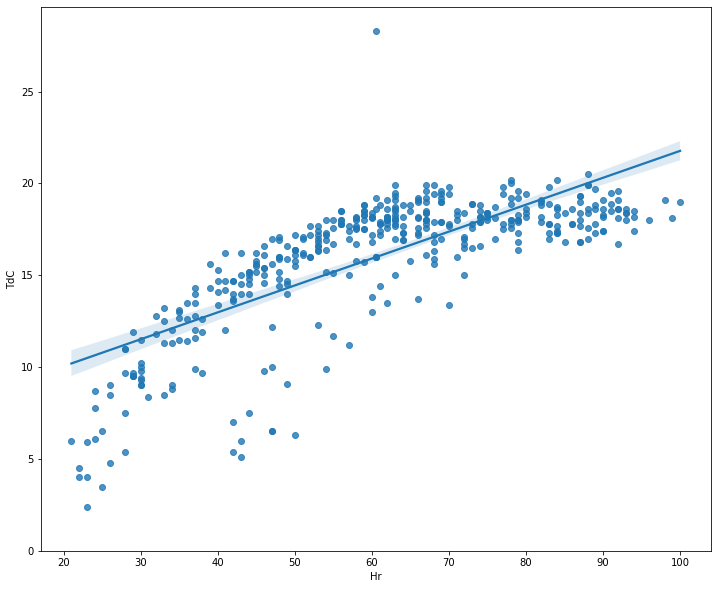

In [50]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="Hr", y="TdC", data=df_arua1)
plt.ylim(0,)

In [55]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Hr vs TdC ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel(' Hr vs TdC')

    plt.show()
    plt.close()

In [56]:
x = df_arua1['Hr']
y = df_arua1['TdC']

In [57]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

           3            2
3.291e-05 x - 0.009653 x + 0.9233 x - 10.53


In [58]:
# Here we use a polynomial of the 3rd order (cubic) 
ff = np.polyfit(x, y, 2)
pp = np.poly1d(f)
print(pp)

           3            2
3.291e-05 x - 0.009653 x + 0.9233 x - 10.53


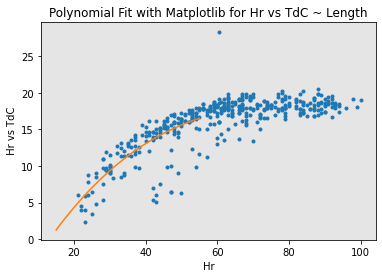

In [60]:
PlotPolly(p, x, y, 'Hr')

In [61]:
np.polyfit(x, y, 3)

array([ 3.29076268e-05, -9.65322586e-03,  9.23292135e-01, -1.05339038e+01])

           3            2
3.291e-05 x - 0.009653 x + 0.9233 x - 10.53


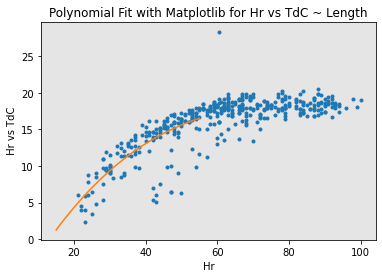

In [66]:
f1 = np.polyfit(x, y, 3)
p1 = np.poly1d(f1)
print(p)
PlotPolly(p1,x,y, 'Hr')

In [67]:
from sklearn.metrics import r2_score

In [68]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.7291300126653075


In [59]:
sns.boxplot(x="body-style", y="price", data=df)

ValueError: Could not interpret input 'body-style'